### This project aims to analyse product sales and customers' purchasing behaviour from April 2020 to November 2020 from a large home appliances and electronics online store.
#### Dataset: https://www.kaggle.com/datasets/mkechinov/ecommerce-purchase-history-from-electronics-store?datasetId=974374&sortBy=voteCount

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/Users/yuemun/Desktop/Python/eCommerce_purchase_history.csv')

In [21]:
df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,month
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-01
2,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-01
5,2020-04-26 08:45:57+00:00,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,1.515916e+18,2020-04-01
6,2020-04-26 09:33:47+00:00,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18,2020-04-01
10,2020-04-26 14:55:26+00:00,2295902490203259134,2273948311742316796,2.268105e+18,appliances.kitchen.refrigerators,lg,462.94,1.515916e+18,2020-04-01


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2020793 entries, 0 to 2633520
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   order_id       int64              
 2   product_id     int64              
 3   category_id    float64            
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        float64            
 8   month          datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 154.2+ MB


In [25]:
df.describe(include=['O']) #count only those are objects

,category_code,brand
count,2020793,1570293
unique,510,22702
top,electronics.smartphone,samsung
freq,357581,328701


In [6]:
#we can see that the top selling product is smartphone and Samsung is the best seller.

#### Data Cleaning

In [9]:
#check if we have duplicate values
df.duplicated()

0          False
1           True
2          False
3           True
4          False
           ...  
2633516    False
2633517    False
2633518    False
2633519    False
2633520    False
Length: 2633521, dtype: bool

In [10]:
#drop the duplicate values
df = df.drop_duplicates()

In [11]:
#check if we have missing values
df.isnull().sum()

event_time             0
order_id               0
product_id             0
category_id       431953
category_code     612053
brand             505965
price             431953
user_id          2069351
dtype: int64

In [3]:
#drop rows with missing category_code
df.dropna(subset=['category_code'],inplace=True) 

In [13]:
df.isnull().sum()

event_time             0
order_id               0
product_id             0
category_id       431953
category_code          0
brand             450500
price             431953
user_id          1586519
dtype: int64

In [170]:
#create a new column - category from the category code
df['category'] = df['category_code'].str.split('.',n=1,expand = True)[1]
df.drop(columns=['category_code'],inplace = True)

In [14]:
df

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
5,2020-04-26 08:45:57 UTC,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,1.515916e+18
6,2020-04-26 09:33:47 UTC,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18
10,2020-04-26 14:55:26 UTC,2295902490203259134,2273948311742316796,2.268105e+18,appliances.kitchen.refrigerators,lg,462.94,1.515916e+18
...,...,...,...,...,...,...,...,...
2633515,2020-11-21 10:08:54 UTC,2388440981134693941,1515966223509088622,2.374499e+18,electronics.video.tv,lg,370.35,1.515916e+18
2633516,2020-11-21 10:10:01 UTC,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18
2633517,2020-11-21 10:10:13 UTC,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18
2633518,2020-11-21 10:10:30 UTC,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18


In [2]:
#change the format of event time (from object to datetime)
df['event_time'] = df['event_time'].apply(pd.to_datetime)

In [ ]:
#add a new column - month
df['month'] = df.event_time.values.astype('datetime64[M]')

#### 1. Customer Spending Behaviour

#### Customer spending by month

In [44]:
price_month = df.groupby("month")["price"].sum()
price_month

month
1970-01-01     1891573.78
2020-01-01    22814885.51
2020-02-01    27259957.66
2020-03-01    32916325.60
2020-04-01     7055787.34
2020-05-01    25585079.28
2020-06-01    39894470.83
2020-07-01    24002478.05
2020-08-01    48561251.33
2020-09-01    44297786.22
2020-10-01    17761368.06
2020-11-01    10830955.44
Name: price, dtype: float64

In [45]:
#create a dataframe 
price_month_df = pd.DataFrame({"month": list(price_month.index),
                    "total_spending": list(price_month.values)})
price_month_df

,month,total_spending
0,1970-01-01,1891573.78
1,2020-01-01,22814885.51
2,2020-02-01,27259957.66
3,2020-03-01,32916325.60
4,2020-04-01,7055787.34
5,2020-05-01,25585079.28
6,2020-06-01,39894470.83
7,2020-07-01,24002478.05
8,2020-08-01,48561251.33
9,2020-09-01,44297786.22


In [46]:
price_month_df.drop(labels=price_month_df[price_month_df.month == '1970-01-01'].index, axis=0, inplace=True)
price_month_df

,month,total_spending
1,2020-01-01,22814885.51
2,2020-02-01,27259957.66
3,2020-03-01,32916325.60
4,2020-04-01,7055787.34
5,2020-05-01,25585079.28
6,2020-06-01,39894470.83
7,2020-07-01,24002478.05
8,2020-08-01,48561251.33
9,2020-09-01,44297786.22
10,2020-10-01,17761368.06


<AxesSubplot:xlabel='month', ylabel='price'>

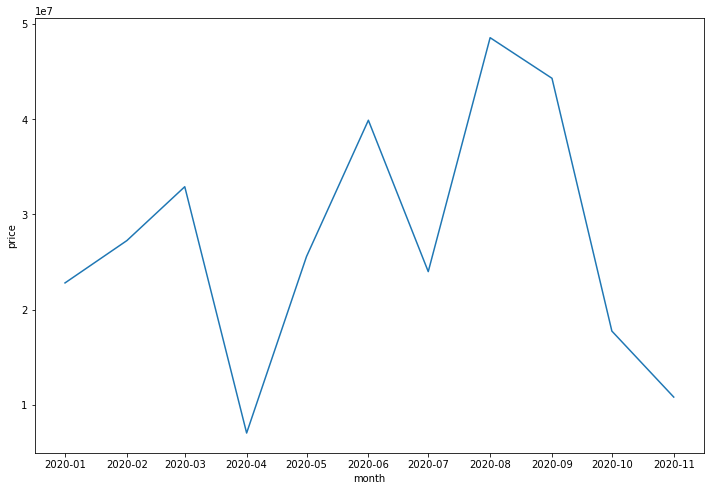

In [47]:
#lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="price", data=df_month_sum)

In [48]:
#Customers spent the most in Aug 2020, more than $45m.

#### Number of customers by month

In [50]:
customer_month = df.groupby("month")["user_id"].count()
customer_month

month
1970-01-01      861
2020-01-01     9540
2020-02-01    12028
2020-03-01    12938
2020-04-01     9131
2020-05-01    31646
2020-06-01    30777
2020-07-01    62651
2020-08-01    84231
2020-09-01    55200
2020-10-01    76944
2020-11-01    48327
Name: user_id, dtype: int64

In [52]:
#create a dataframe 
customer_month_df = pd.DataFrame({"month": list(customer_month.index),
                    "total_customers": list(customer_month.values)})
customer_month_df

,month,total_customers
0,1970-01-01,861
1,2020-01-01,9540
2,2020-02-01,12028
3,2020-03-01,12938
4,2020-04-01,9131
5,2020-05-01,31646
6,2020-06-01,30777
7,2020-07-01,62651
8,2020-08-01,84231
9,2020-09-01,55200


In [53]:
customer_month_df.drop(labels=customer_month_df[customer_month_df.month == '1970-01-01'].index, axis=0, inplace=True)
customer_month_df

,month,total_customers
1,2020-01-01,9540
2,2020-02-01,12028
3,2020-03-01,12938
4,2020-04-01,9131
5,2020-05-01,31646
6,2020-06-01,30777
7,2020-07-01,62651
8,2020-08-01,84231
9,2020-09-01,55200
10,2020-10-01,76944


<AxesSubplot:xlabel='month', ylabel='total_customers'>

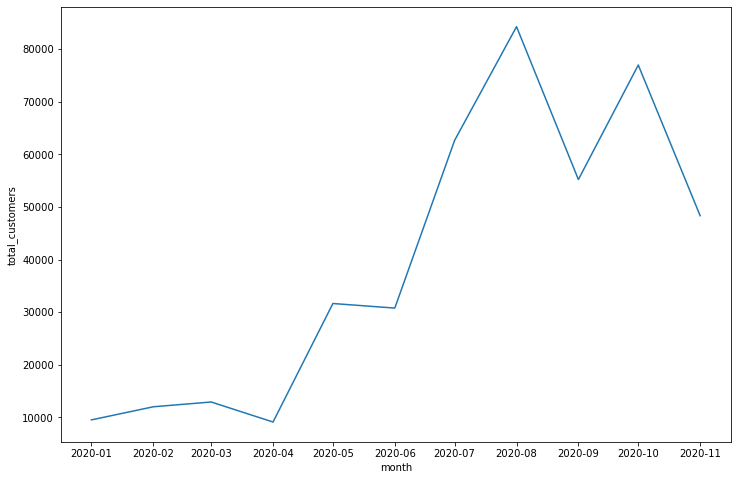

In [55]:
#lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="total_customers", data=customer_month_df)

In [56]:
#We can see that from figure 1 & 2, both spending and number of customers peaked at Aug 2020.
#It is good to note that in July, total spending has dropped and the increasing rate of customers has slowed down. 
#This suggests that customer's spending on price per unit has been decreased.

#### 2. Brand performance

#### Top 10 brands

In [88]:
#reset index = assign new index
best_performing_brands = df.groupby('brand')['price'].sum().reset_index().sort_values('price',ascending=False).head(10)
best_performing_brands['million_USD'] = best_performing_brands.price/1000000
best_performing_brands

,brand,price,million_USD
22571,samsung,89146419.33,89.146419
22145,apple,47759437.98,47.759438
22424,lg,25752532.28,25.752532
22157,asus,10626723.91,10.626724
22356,huawei,10615116.85,10.615117
22423,lenovo,10483241.09,10.483241
22201,bosch,9991694.06,9.991694
22178,beko,7827359.32,7.827359
22502,oppo,7318125.71,7.318126
22164,ava,6524424.01,6.524424


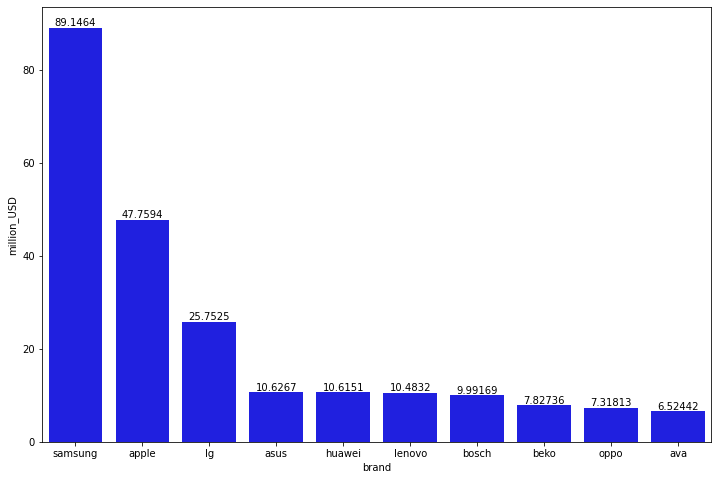

In [89]:
#Barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x = "brand", y = "million_USD",data=best_performing_brands, color='blue')
ax.bar_label(ax.containers[0]) #add bar label
plt.show()

In [90]:
#Samsung was the best-selling brand, which held the largest slice of the electronics market.

#### Number of customers for each brand

In [92]:
#reset index = assign new index
best_sold_brands = df.groupby('brand')['user_id'].count().reset_index().sort_values('user_id',ascending=False).head(15)
best_sold_brands

,brand,user_id
22571,samsung,89879
22145,apple,34877
22164,ava,20422
22424,lg,16329
22628,tefal,14458
22686,xiaomi,12017
22356,huawei,9937
22201,bosch,9409
22157,asus,9096
22524,philips,7981


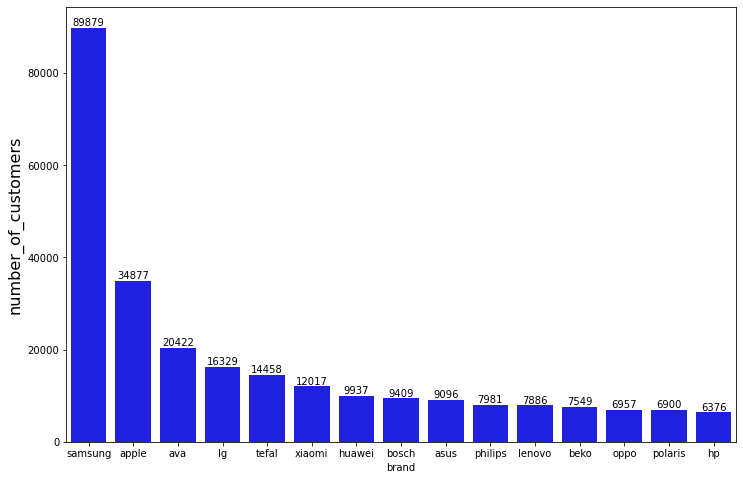

In [96]:
#Barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x = "brand", y = "user_id",data=best_sold_brands, color='blue')
plt.ylabel("number_of_customers", fontsize=16)
ax.bar_label(ax.containers[0]) #add bar label
plt.show()

In [97]:
#Samsung has the highest number of customers from April 2020 to November 2020. 

#### 3. New vs. Existing Customers

In [163]:
df_=df.copy()
df_.index=df_['event_time'] #make event_time as index
df_user=df_["2020-04":"2020-11"].groupby('user_id') #select certain index
user_life = df_user.event_time.agg(['min','max']) #find min and max event time for each user id
user_life.head()

/var/folders/wx/1t7r70td2c98x42h3cl0zcxr0000gn/T/ipykernel_1209/3381162850.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_user=df_["2020-04":"2020-11"].groupby('user_id')


,min,max
user_id,,
1.515916e+18,2020-07-09 06:35:18+00:00,2020-07-09 06:35:18+00:00
1.515916e+18,2020-09-22 15:11:15+00:00,2020-10-28 05:53:47+00:00
1.515916e+18,2020-10-23 03:51:26+00:00,2020-11-16 15:49:50+00:00
1.515916e+18,2020-06-10 21:37:30+00:00,2020-10-20 09:54:43+00:00
1.515916e+18,2020-05-16 16:09:13+00:00,2020-07-14 13:04:12+00:00


In [167]:
(user_life['max'] == user_life['min']).value_counts() 

False    47811
True     43102
dtype: int64

In [ ]:
#Around half of the customers are existing customers.